<h1>Activity 2 UK - Accident Data Analytics Projects</h1>
<hr>
<h3>Analyst: Jerwin Nico H. Quijano.</h3>

In [36]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('datasets//uk_road_accident.csv')
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [39]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Cleaning Data</h1>
<hr>

In [40]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Replacing null values with statistaclly accepted value.</h1>
<hr>

In [41]:
null_val = df['Latitude'].mean()
df['Latitude'] = df['Latitude'].fillna(null_val)

In [42]:
null_val = df['Longitude'].mean()
df['Longitude'] = df['Longitude'].fillna(null_val)

In [43]:
null_val = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(null_val)

In [44]:
null_val = df['Road_Type'].mode()[0]
df['Road_Type'] = df['Road_Type'].fillna(null_val)

In [45]:
null_val = df['Urban_or_Rural_Area'].mode()[0]
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(null_val)

In [46]:
null_val = df['Weather_Conditions'].mode()[0]
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(null_val)

In [47]:
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Descriptive Analysis</h1>
<hr></hr>
<ol>
   <li>What is the Average Casualties on Urban, Rural and Unallocated Area?</li> 
    <li>Does Night have more Number of Casualites than Morning?</li>
    <li>How many serious Casualties Happens at Daylight?</li>
    <li>Does the fatality decrease or increase if using a motorcyle with higher CC compare to low CC?</li>
    <li>On average per how many accident happend depending on the Roadtype, Urban/Rural Area, and Accident Severitiy?</li>
    <li>What type of road causes most accident by total?</li>
    <li>Does weather conditions affect the number of casualties?</li>
    <li>What road type and road surface conditions causes the more accident?</li>
    <li>Which District Area report most accident?</li>
    <li>Does involving more cars lead to higher casualties?</li>
    <li>Which district has the highest average number of casualties per accident?</li>
    <li>What’s the most common accident severity level?</li>
    <li>Do severe accidents (high Accident_Severity) involve more vehicles on average?</li>
    <li>What is the most prone to accident vehicel during rainy season?</li>
    <li>What is the total casualties of rainy nights?</li>
    <li>In what district causes more accident during rainy nights?</li>
    <li>What is the most common Vehicel use in the most prone accident district?</li>
    <li>What is the average casualties in the most prone accident district?</li>
    <li>How many people in total got injured in rainy-night conditions?</li>
    <li>Do fatal accidents in the City of London involve more casualties on average compared to serious and slight accidents?</li>
</ol>

Average Number of Casualties in Urban area: 1.29%
Average Number of Casualties in Rural area: 1.48%
Average Number of Casualties in Rural area: 1.18%


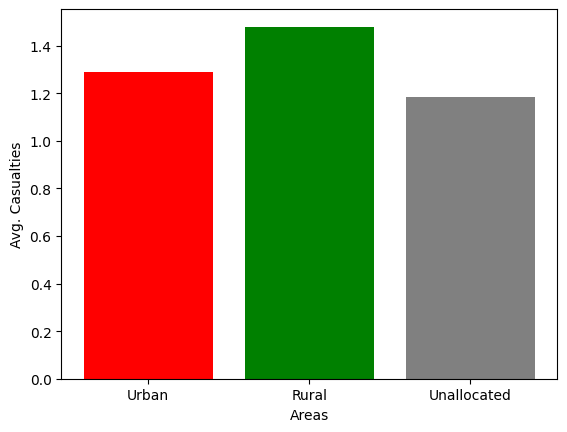

In [48]:
urban = df[df['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'].mean()
print(f"Average Number of Casualties in Urban area: {urban:.2f}%")

rural = df[df['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties'].mean()
print(f"Average Number of Casualties in Rural area: {rural:.2f}%")

not_recorded = df[df['Urban_or_Rural_Area'] == 'Unallocated']['Number_of_Casualties'].mean()
print(f"Average Number of Casualties in Rural area: {not_recorded:.2f}%")

#chart

plt.bar(['Urban', 'Rural', 'Unallocated'], [urban, rural, not_recorded], color=['red', 'green', 'grey'])
plt.xlabel('Areas')
plt.ylabel('Avg. Casualties')
plt.show()

<h1>Insight</h1>
<hr>
<p>It turns out that the average percentage of casualties happens in Rural Areas while Urban areas has a much lesser average of casualties.</p>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [50]:
df[df['Light_Conditions'] == 'Daylight']['Number_of_Casualties'].sum()

np.int64(649889)

In [51]:
df[df['Light_Conditions'] != 'Daylight']['Number_of_Casualties'].sum()

np.int64(246679)

<h1>Insights</h1>
<hr>
<p>So it turns out that there a more casualties happen at daylight than night.</p>

In [52]:
df[(df['Accident_Severity'] == 'Serious') & (df['Light_Conditions'] == 'Daylight')]['Number_of_Casualties'].sum()

np.int64(87023)

<h1>Insights</h1>
<hr>
<p>The number of Serious Accident happened during daylight were 87023.</p>

In [53]:
df.groupby(['Vehicle_Type'])['Number_of_Casualties'].sum()

Vehicle_Type
Agricultural vehicle                       2613
Bus or coach (17 or more pass seats)      34915
Car                                      676692
Data missing or out of range                  9
Goods 7.5 tonnes mgw and over             23397
Goods over 3.5t. and under 7.5t            8308
Minibus (8 - 16 passenger seats)           2659
Motorcycle 125cc and under                20348
Motorcycle 50cc and under                 10167
Motorcycle over 125cc and up to 500cc     10286
Motorcycle over 500cc                     34879
Other vehicle                              7554
Pedal cycle                                 270
Ridden horse                                  5
Taxi/Private hire car                     18195
Van / Goods 3.5 tonnes mgw or under       46271
Name: Number_of_Casualties, dtype: int64

<h1>Insights</h1>
<hr>
<p>It turns out that riding a Higher CC motorcylce has risk of more accident.</p>

In [54]:
result = df.groupby(['Road_Type', 'Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].mean()
print(result)

Road_Type           Urban_or_Rural_Area  Accident_Severity
Dual carriageway    Rural                Fatal                2.168193
                                         Serious              1.814654
                                         Slight               1.506083
                    Unallocated          Slight               1.000000
                    Urban                Fatal                1.618893
                                         Serious              1.445393
                                         Slight               1.388114
One way street      Rural                Fatal                1.375000
                                         Serious              1.305195
                                         Slight               1.210475
                    Urban                Fatal                1.264368
                                         Serious              1.217189
                                         Slight               1.185285
Roundabout        

<h1>Insights</h1>
<hr>
<p>I noticed that slip road on the rural area tend to have more fatal accident compare to the rural areas suggesting that they might be a accident prone area in that area.</p>

<Figure size 500x600 with 0 Axes>

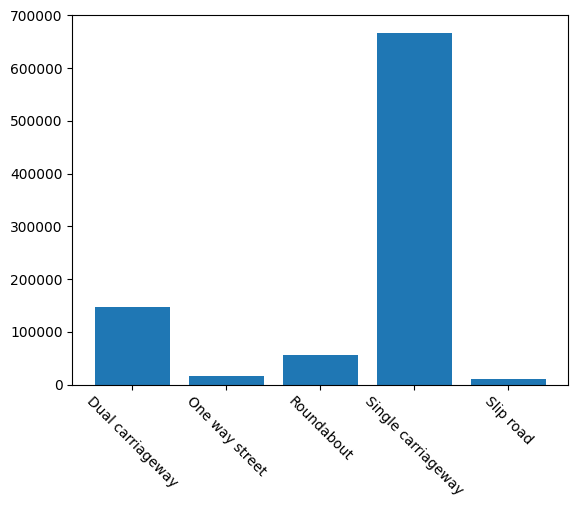

<Figure size 500x600 with 0 Axes>

In [55]:
datas = df.groupby(['Road_Type'])['Number_of_Casualties'].sum()
plt.bar(datas.index, datas.values)
plt.xticks(rotation=-45, ha='center')
plt.figure(figsize=(5, 6))

<h1>Insights</h1>
<hr>
<p>The road type that has more recorded accident by total were Single carriageway.</p>

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.347397
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
Name: Number_of_Casualties, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fine + high winds'),
  Text(1, 0, 'Fine no high winds'),
  Text(2, 0, 'Fog or mist'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Raining + high winds'),
  Text(5, 0, 'Raining no high winds'),
  Text(6, 0, 'Snowing + high winds'),
  Text(7, 0, 'Snowing no high winds')])

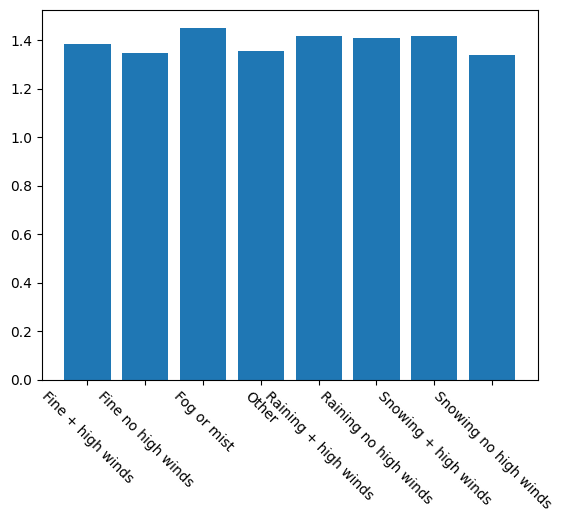

In [56]:
data = df.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
print(data)
plt.bar(data.index, data.values)
plt.xticks(rotation=-45)


<h1>Insights</h1>
<hr>
<p>Fog causes more accident with 1.45%, i think drivers cannot see in this weather conditions thus causes accident.</p>

In [57]:
df[df['Number_of_Casualties'] == df['Number_of_Casualties'].max()]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
117980,200743N002017,Fatal,3/1/2019,51.497547,Darkness - lights lit,South Bucks,-0.496697,68,1,Wet or damp,Slip road,Rural,Raining no high winds,Car


<h1>Insights</h1>
<hr>
<p>So it truns out that the district that report the most fatal accident is South Bucks where it has 68 number of casualties and accident severity set to fatal.</p>

In [58]:
data = df['Number_of_Casualties'].corr(df['Number_of_Vehicles'])
data

np.float64(0.2288888612692756)

<h1>Insights</h1>
<hr>
<p>Involving more cars does not mean leading to Higher casualties</p>

In [59]:
data = df.groupby('District Area')['Number_of_Casualties'].mean()
max_val = data.max()
print(data[data == max_val])

District Area
Blaeu Gwent    1.693694
Name: Number_of_Casualties, dtype: float64


<h1>Insights</h1>
<hr>
<p>It turns out that District with the high casualties by average were Blaeu Gwent a rural area it surprise me that a rural area has highest average of casualties.</p>

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [61]:
data = df.groupby('Accident_Severity')['Number_of_Casualties'].size()
print(data)

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
Name: Number_of_Casualties, dtype: int64


<h1>Insights</h1>
<hr>
<p>The most common accident severity level were Slight followed by the serious and the least were Fatal.</p>

<BarContainer object of 3 artists>

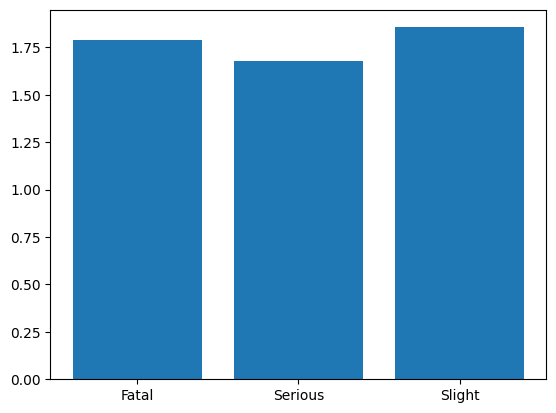

In [62]:
data = df.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

plt.bar(data.index, data.values)


<h1>Insights</h1>
<hr>
<p>No, High accident severity doesn't mean it has more vehicles.</p>

In [63]:
rainy_no_winds = df[df['Weather_Conditions'] == 'Raining no high winds'].groupby('Vehicle_Type')['Number_of_Casualties'].sum()
rainy_high_winds = df[df['Weather_Conditions'] == 'Raining + high winds'].groupby('Vehicle_Type')['Number_of_Casualties'].sum()
print("No high winds:")
print(rainy_no_winds[rainy_no_winds == rainy_no_winds.max()])
print('==============================================')
print("With high winds:")
print(rainy_no_winds[rainy_no_winds == rainy_no_winds.max()])

No high winds:
Vehicle_Type
Car    84521
Name: Number_of_Casualties, dtype: int64
With high winds:
Vehicle_Type
Car    84521
Name: Number_of_Casualties, dtype: int64


<h1>Insights</h1>
<hr>
<p>I was hoping to see motorcylce but it car is most prone to accident during the rainy seasons.</p>

In [64]:
night_rainy = df[((df['Weather_Conditions'] == 'Raining no high winds') | (df['Weather_Conditions'] == 'Raining + high winds')) & ((df['Light_Conditions'] == 'Darkness - lights lit') | (df['Light_Conditions'] == 'Darkness - lights unlit') | (df['Light_Conditions'] == 'Darkness - no lighting') | (df['Light_Conditions'] == 'Darkness - lighting unknown'))
]['Number_of_Casualties'].sum()
night_rainy

np.int64(49149)

<h1>Insights</h1>
<hr>
<p>I turns out that the total casualties during rainy night are 49149.</p>

In [65]:
night_rainy = df[((df['Weather_Conditions'] == 'Raining no high winds') | (df['Weather_Conditions'] == 'Raining + high winds')) & ((df['Light_Conditions'] == 'Darkness - lights lit') | (df['Light_Conditions'] == 'Darkness - lights unlit') | (df['Light_Conditions'] == 'Darkness - no lighting') | (df['Light_Conditions'] == 'Darkness - lighting unknown'))
]

data = night_rainy.groupby('District Area')['Number_of_Casualties'].max().reset_index().sort_values(by='Number_of_Casualties', ascending=False)

data.head(10)


,District Area,Number_of_Casualties
312,South Bucks,68
73,Chester,21
127,Eastleigh,17
132,Enfield,16
32,Bolton,16
361,Tendring,15
360,Telford and Wrekin,15
120,East Lindsey,13
256,Oldham,13
314,South Derbyshire,10


<h1>Insights</h1>
<hr>
<p>It turns out that Sout bukcs a rural district in englad has the most Number of casualties duringa rainy night accident.</p>

In [66]:
most_common_car = night_rainy['Vehicle_Type'].mode()[0]
night_rainy[night_rainy['Vehicle_Type'] == most_common_car]['Number_of_Casualties'].sum()

np.int64(36909)

<h1>Insights</h1>
<hr>
<p>The most common vehicle to get into accident during rainy nights were car with the total 36909 of casualties.</p>

In [67]:
avg_casualties = df.groupby('District Area')['Number_of_Casualties'].mean()
lowest_casualties = avg_casualties.min()
data = avg_casualties[avg_casualties == lowest_casualties]
data

District Area
City of London    1.126044
Name: Number_of_Casualties, dtype: float64

<h1>Insights</h1>
<hr>
<p>The average casualties is 1.12% of the least prone to accident district were City of London, no suprise becasue people their tend to walk than to ride a vehicle.</p>

In [68]:
data = night_rainy[(night_rainy['Accident_Severity'] == 'Fatal') & (night_rainy['Vehicle_Type'] == 'Motorcycle over 500cc')]
max_casualties = data['Number_of_Casualties'].max()
data[data['Number_of_Casualties'] == max_casualties]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
997,200701CP00318,Fatal,19-11-2019,51.516045,Darkness - lights lit,City of London,-0.081859,7,2,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle over 500cc


<h1>Insights</h1>
<hr>
<p>In the City of London, the deadliest rainy-night accident involving a motorcycle over 500cc caused 7 casualties in a single crash. This accident happened under dark conditions with street lights on and on a wet road surface.</p>

<BarContainer object of 3 artists>

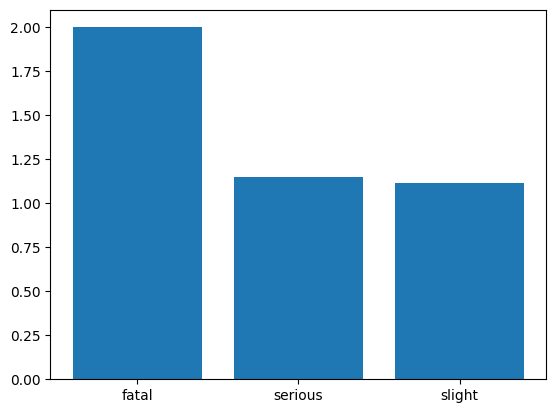

In [69]:
fatal_accidents = df[(df['Accident_Severity'] == 'Fatal') & (df['District Area'] == 'City of London')]['Number_of_Casualties'].mean()
serious_accidents = df[(df['Accident_Severity'] == 'Serious')  & (df['District Area'] == 'City of London')]['Number_of_Casualties'].mean()
slight_accidents = df[(df['Accident_Severity'] == 'Slight')  & (df['District Area'] == 'City of London')]['Number_of_Casualties'].mean()

plt.bar(['fatal', 'serious', 'slight'], [fatal_accidents,serious_accidents,slight_accidents])

<h1>Insights</h1>
<hr>
<p> In the City of London, fatal accidents result in a higher average number of casualties per incident compared to serious or slight accidents. This indicates that when a crash escalates to fatal severity, it tends to involve more people being harmed, not just a single victim.

Meanwhile, serious and slight accidents involve fewer casualties on average, suggesting they are more localized or less catastrophic in scale.

This pattern highlights the disproportionate impact of fatal crashes—though they may occur less frequently, each one typically affects a larger group of road users, amplifying their social and safety impact.</p>

In [70]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)